<b>Date: 9/17/2021 <br>
To: Dr. Palmtag <br>
From: Alie Akins <br> 

Subject: Utilizing Euler's Method in order to solve the activity for a nuclide chain. </b>


<b>Introduction </b> <br>
The goal of this project is to use Euler's Method in order to model the activity of a chain of nuclides as they progress through time.

<b>Background </b> <br>
Euler's method is a numerical procedure that uses time steps in order to act as though the equation is moving through time. By using very small time steps it is like calculating a formula for a specific time, then changing it slightly as the time advances. This can be done for any function as long an intial value is known. The following is the methodology of this project.<br>

The analytical formula is <br>

$N_{2}(t) = N_{2}(0)e^{-\lambda_{2}t} + \frac{\lambda_{1}N_{1}(0)}{\lambda_{2}-\lambda_{1}} [e^{-\lambda_{1}t}- e^{-\lambda_{2}t}]$ <br>

Euler's formula for this scenario is <br>

$N_{a}^{k} = N_{a}^{k-1} - N_{a}^{k-1}\lambda_{a}\Delta t$ <br>
$N_{b}^{k} = N_{b}^{k-1} - N_{b}^{k-1}\lambda_{b}\Delta t + N_{a}^{k-1}\lambda_{a}\Delta t$ <br>
$N_{c}^{k} = N_{c}^{k-1} - N_{c}^{k-1}\lambda_{c}\Delta t + N_{b}^{k-1}\lambda_{b}\Delta t$ 

Results: The results are as follows

In [126]:
#This is a package which allows python to work with arrays.
import numpy as np
#This is a package which allows python to plot
from matplotlib import pyplot as plt
#allows python to do exponentials
import math

The analytic solution for 10 time steps. I will be using a convergence of 5 Bq.

starting time:0
ending time:50
number of time steps(PLEASE INPUT AN INTEGER):100000
The activity at 5 hours is 1837535292.5205712 Bq


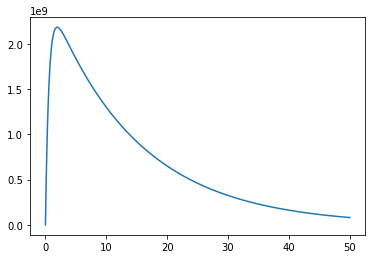

In [127]:
#Collect our variables via user input
start_time = float(input("starting time:"))
end_time = float(input("ending time:"))
total_time_steps = int(input("number of time steps(PLEASE INPUT AN INTEGER):"))
delta_t = (end_time-start_time)/total_time_steps
t = np.linspace(start_time, end_time, total_time_steps)
QOI_N_list = []
N_1_o = 36000000000
N_2_o = 0
hl_1 = 10
hl_2 = 0.4
lambda_1 = np.log(2) / hl_1
lambda_2 = np.log(2) / hl_2


#go through all of t and calculate N(t)
for i in range(0, len(t)):
    t_of_interest = t[i]
    QOI = N_2_o * math.exp(-lambda_2 * t_of_interest) + ((lambda_1 * N_1_o)/(lambda_2 - lambda_1))*(math.exp(-lambda_1*t_of_interest) - math.exp(-lambda_2*t_of_interest))
    

    QOI_N_list.append(QOI)

#Get the data in the proper form
QOI_N_array = np.array(QOI_N_list)
QOI_A=QOI_N_array*lambda_2

#Interpolate to find the QOI at 5 hours
anal_graph = plt.plot(t, QOI_A)
interpolate_anal = np.interp(5, t, QOI_A)
activity_a = lambda_2 * interpolate_anal
print("The activity at 5 hours is " + str(interpolate_anal) + " Bq" )

The calculated solution for 10 steps  

In [128]:
#Get the variables using user input
start_time = float(input("starting time:"))
end_time = float(input("ending time:"))
total_time_steps = int(input("number of time steps(PLEASE INPUT AN INTEGER):"))
delta_t = (end_time-start_time)/total_time_steps
t = np.linspace(start_time, end_time, total_time_steps)
hl_list = list(map(float, input("Enter all half lives in a constant unit seperated by a space in order of their respective N value (ex. 20 33 1): ").split()))
hl_array = np.array(hl_list)
lambda_array = np.log(2) / hl_array


N_initial_list = list(map(float, input("Enter all intitial N values seperated by a space in order (ex. 20 33 1): ").split()))
N_initial = np.array(N_initial_list)

#check to make sure there is a lambda for each number density
if len(lambda_array) != len(N_initial):
    print("The implemented lambdas and Ns do not match, please run the code and re-enter correctly")

starting time:0
ending time:50
number of time steps(PLEASE INPUT AN INTEGER):10
Enter all half lives in a constant unit seperated by a space in order of their respective N value (ex. 20 33 1): 10 0.4
Enter all intitial N values seperated by a space in order (ex. 20 33 1): 36000000000 0


In [129]:
lambda_len = len(lambda_array)
N = np.zeros(shape = (total_time_steps, lambda_len))

N[0][:] = N_initial
#Go through the total time steps
for k in range(1, total_time_steps):
    #At each time step, perform the numerical version of the number density formula
    for i in range(0,1):
        N[k][i] = (1 - lambda_array[i]*delta_t)*N[k-1][i]
    for i in range(1, lambda_len):
        N[k][i] = N[k-1][i] - N[k-1][i]*lambda_array[i]*delta_t + N[k-1][i-1]*lambda_array[i-1]*delta_t

        

The activity at 5 hours is 1716995967.4683166 Bq


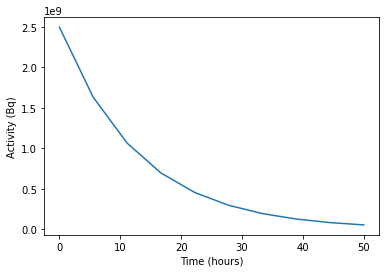

The activity at 5 hours is 19458347063.687153 Bq


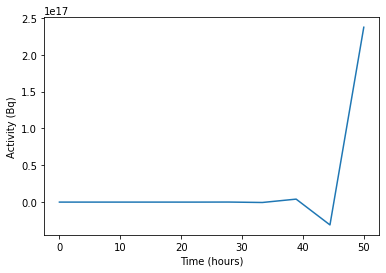

In [130]:
#Create our time array
t= np.linspace(start_time, end_time, total_time_steps )

#For each of the nuclides, go through
for i in range(0, lambda_len):
    N_list = []
    t_list = []
    #and go through them the total number of time steps
    for h in range(0, total_time_steps):
        #find the correct N and t values
        N_of_interest = N[h][i]
        t_of_interest = t[h]
        N_list.append(N_of_interest)
        t_list.append(t_of_interest)
    #get them in the correct data format
    QOI_N_array = np.array(N_list)
    QOI_A = QOI_N_array * lambda_array[i]
    
    #plot and interpolate
    graph = plt.plot(t_list, QOI_A)
    interpolate_cal = np.interp(5, t_list, QOI_A)
    print("The activity at 5 hours is " + str(interpolate_cal) + " Bq")
    plt.xlabel("Time (hours)")
    plt.ylabel("Activity (Bq)")
    plt.show()
    

Absolute error between the calculated QOI and the analytic solution QOI

In [131]:
#calculate absolute error
abs_error_10 = (interpolate_cal- interpolate_anal) / interpolate_anal

100 time step

In [132]:
#All instructions are repeated
start_time = float(input("starting time:"))
end_time = float(input("ending time:"))
total_time_steps = int(input("number of time steps(PLEASE INPUT AN INTEGER):"))
delta_t = (end_time-start_time)/total_time_steps
t = np.linspace(start_time, end_time, total_time_steps)
hl_list = list(map(float, input("Enter all half lives in a constant unit seperated by a space in order of their respective N value (ex. 20 33 1): ").split()))
hl_array = np.array(hl_list)
lambda_array = np.log(2) / hl_array


N_initial_list = list(map(float, input("Enter all intitial N values seperated by a space in order (ex. 20 33 1): ").split()))
N_initial = np.array(N_initial_list)

if len(lambda_array) != len(N_initial):
    print("The implemented lambdas and Ns do not match, please run the code and re-enter correctly")

starting time:0
ending time:50
number of time steps(PLEASE INPUT AN INTEGER):100
Enter all half lives in a constant unit seperated by a space in order of their respective N value (ex. 20 33 1): 10 0.4
Enter all intitial N values seperated by a space in order (ex. 20 33 1): 36000000000 0


In [133]:
lambda_len = len(lambda_array)
N = np.zeros(shape = (total_time_steps, lambda_len))

N[0][:] = N_initial
for k in range(1, total_time_steps):
    for i in range(0,1):
        N[k][i] = (1 - lambda_array[i]*delta_t)*N[k-1][i]
    for i in range(1, lambda_len):
        N[k][i] = N[k-1][i] - N[k-1][i]*lambda_array[i]*delta_t + N[k-1][i-1]*lambda_array[i-1]*delta_t
        

        

The activity at 5 hours is 1759945660.835122 Bq


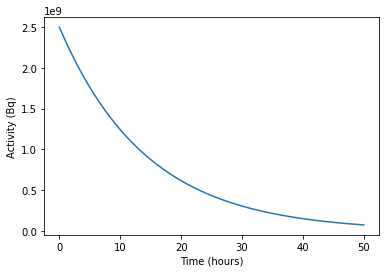

The activity at 5 hours is 1833276722.292741 Bq


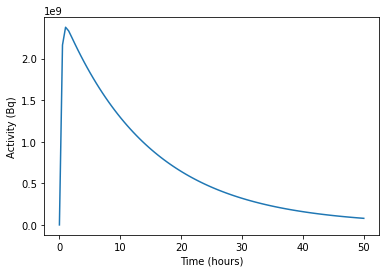

In [134]:
t= np.linspace(start_time, end_time, total_time_steps )

for i in range(0, lambda_len):
    N_list = []
    t_list = []
    for h in range(0, total_time_steps):
        N_of_interest = N[h][i]
        t_of_interest = t[h]
        N_list.append(N_of_interest)
        t_list.append(t_of_interest)
    
    QOI_N_array = np.array(N_list)
    QOI_A = QOI_N_array * lambda_array[i]

    graph = plt.plot(t_list, QOI_A)
    interpolate_cal = np.interp(5, t_list, QOI_A)
    print("The activity at 5 hours is " + str(interpolate_cal) + " Bq")
    plt.xlabel("Time (hours)")
    plt.ylabel("Activity (Bq)")
    plt.show()
    

Absolute error between the calculated QOI and the analytic solution QOI for 100 time steps

1000 time step

In [135]:
start_time = float(input("starting time:"))
end_time = float(input("ending time:"))
total_time_steps = int(input("number of time steps(PLEASE INPUT AN INTEGER):"))
delta_t = (end_time-start_time)/total_time_steps
t = np.linspace(start_time, end_time, total_time_steps)
hl_list = list(map(float, input("Enter all half lives in a constant unit seperated by a space in order of their respective N value (ex. 20 33 1): ").split()))
hl_array = np.array(hl_list)
lambda_array = np.log(2) / hl_array


N_initial_list = list(map(float, input("Enter all intitial N values seperated by a space in order (ex. 20 33 1): ").split()))
N_initial = np.array(N_initial_list)

if len(lambda_array) != len(N_initial):
    print("The implemented lambdas and Ns do not match, please run the code and re-enter correctly")

starting time:0
ending time:50
number of time steps(PLEASE INPUT AN INTEGER):1000
Enter all half lives in a constant unit seperated by a space in order of their respective N value (ex. 20 33 1): 10 0.4
Enter all intitial N values seperated by a space in order (ex. 20 33 1): 36000000000 0


In [136]:
lambda_len = len(lambda_array)
N = np.zeros(shape = (total_time_steps, lambda_len))

N[0][:] = N_initial
for k in range(1, total_time_steps):
    for i in range(0,1):
        N[k][i] = (1 - lambda_array[i]*delta_t)*N[k-1][i]
    for i in range(1, lambda_len):
        N[k][i] = N[k-1][i] - N[k-1][i]*lambda_array[i]*delta_t + N[k-1][i-1]*lambda_array[i-1]*delta_t
        

        

The activity at 5 hours is 1764016119.4490597 Bq


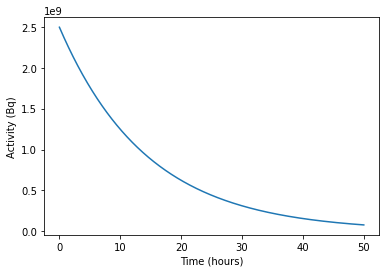

The activity at 5 hours is 1837212706.514996 Bq


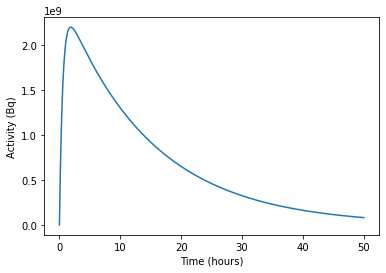

In [137]:
t= np.linspace(start_time, end_time, total_time_steps )

for i in range(0, lambda_len):
    N_list = []
    t_list = []
    for h in range(0, total_time_steps):
        N_of_interest = N[h][i]
        t_of_interest = t[h]
        N_list.append(N_of_interest)
        t_list.append(t_of_interest)
    
    QOI_N_array = np.array(N_list)
    QOI_A = QOI_N_array * lambda_array[i]

    graph = plt.plot(t_list, QOI_A)
    interpolate_cal = np.interp(5, t_list, QOI_A)
    print("The activity at 5 hours is " + str(interpolate_cal) + " Bq")
    plt.xlabel("Time (hours)")
    plt.ylabel("Activity (Bq)")
    plt.show()
    

Absolute error between the calculated QOI and the analytic solution QOI for 1000 time steps

In [138]:
abs_error_1000 = (interpolate_cal- interpolate_anal) / interpolate_anal

10000 time step

In [139]:
start_time = float(input("starting time:"))
end_time = float(input("ending time:"))
total_time_steps = int(input("number of time steps(PLEASE INPUT AN INTEGER):"))
delta_t = (end_time-start_time)/total_time_steps
t = np.linspace(start_time, end_time, total_time_steps)
hl_list = list(map(float, input("Enter all half lives in a constant unit seperated by a space in order of their respective N value (ex. 20 33 1): ").split()))
hl_array = np.array(hl_list)
lambda_array = np.log(2) / hl_array


N_initial_list = list(map(float, input("Enter all intitial N values seperated by a space in order (ex. 20 33 1): ").split()))
N_initial = np.array(N_initial_list)

if len(lambda_array) != len(N_initial):
    print("The implemented lambdas and Ns do not match, please run the code and re-enter correctly")

starting time:0
ending time:50
number of time steps(PLEASE INPUT AN INTEGER):10000
Enter all half lives in a constant unit seperated by a space in order of their respective N value (ex. 20 33 1): 10 0.4
Enter all intitial N values seperated by a space in order (ex. 20 33 1): 36000000000 0


In [140]:
lambda_len = len(lambda_array)
N = np.zeros(shape = (total_time_steps, lambda_len))

N[0][:] = N_initial
for k in range(1, total_time_steps):
    for i in range(0,1):
        N[k][i] = (1 - lambda_array[i]*delta_t)*N[k-1][i]
    for i in range(1, lambda_len):
        N[k][i] = N[k-1][i] - N[k-1][i]*lambda_array[i]*delta_t + N[k-1][i-1]*lambda_array[i-1]*delta_t
        

        

The activity at 5 hours is 1764419838.3527458 Bq


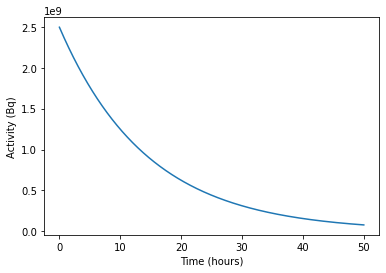

The activity at 5 hours is 1837504852.6383603 Bq


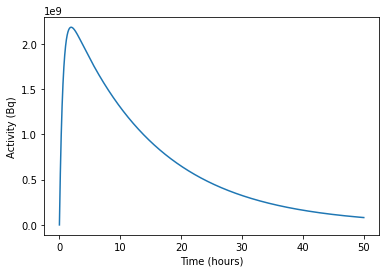

In [141]:
t= np.linspace(start_time, end_time, total_time_steps )

for i in range(0, lambda_len):
    N_list = []
    t_list = []
    for h in range(0, total_time_steps):
        N_of_interest = N[h][i]
        t_of_interest = t[h]
        N_list.append(N_of_interest)
        t_list.append(t_of_interest)
    
    QOI_N_array = np.array(N_list)
    QOI_A = QOI_N_array * lambda_array[i]

    graph = plt.plot(t_list, QOI_A)
    interpolate_cal = np.interp(5, t_list, QOI_A)
    print("The activity at 5 hours is " + str(interpolate_cal) + " Bq")
    plt.xlabel("Time (hours)")
    plt.ylabel("Activity (Bq)")
    plt.show()
    

Absolute error between the calculated QOI and the analytic solution QOI for 10000 time steps

In [142]:
abs_error_10000 = (interpolate_cal- interpolate_anal) / interpolate_anal

100000 time step

In [143]:
start_time = float(input("starting time:"))
end_time = float(input("ending time:"))
total_time_steps = int(input("number of time steps(PLEASE INPUT AN INTEGER):"))
delta_t = (end_time-start_time)/total_time_steps
t = np.linspace(start_time, end_time, total_time_steps)
hl_list = list(map(float, input("Enter all half lives in a constant unit seperated by a space in order of their respective N value (ex. 20 33 1): ").split()))
hl_array = np.array(hl_list)
lambda_array = np.log(2) / hl_array


N_initial_list = list(map(float, input("Enter all intitial N values seperated by a space in order (ex. 20 33 1): ").split()))
N_initial = np.array(N_initial_list)

if len(lambda_array) != len(N_initial):
    print("The implemented lambdas and Ns do not match, please run the code and re-enter correctly")

starting time:0
ending time:50
number of time steps(PLEASE INPUT AN INTEGER):100000
Enter all half lives in a constant unit seperated by a space in order of their respective N value (ex. 20 33 1): 10 0.4
Enter all intitial N values seperated by a space in order (ex. 20 33 1): 36000000000 0


In [144]:
lambda_len = len(lambda_array)
N = np.zeros(shape = (total_time_steps, lambda_len))

N[0][:] = N_initial
for k in range(1, total_time_steps):
    for i in range(0,1):
        N[k][i] = (1 - lambda_array[i]*delta_t)*N[k-1][i]
    for i in range(1, lambda_len):
        N[k][i] = N[k-1][i] - N[k-1][i]*lambda_array[i]*delta_t + N[k-1][i-1]*lambda_array[i-1]*delta_t
        

        

The activity at 5 hours is 1764460176.5950806 Bq


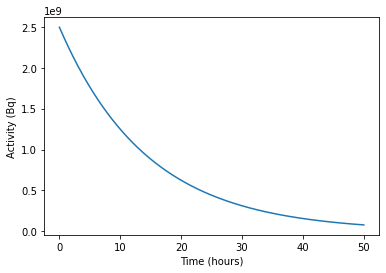

The activity at 5 hours is 1837532267.4111423 Bq


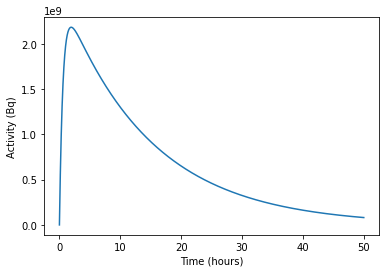

In [145]:
t= np.linspace(start_time, end_time, total_time_steps )

for i in range(0, lambda_len):
    N_list = []
    t_list = []
    for h in range(0, total_time_steps):
        N_of_interest = N[h][i]
        t_of_interest = t[h]
        N_list.append(N_of_interest)
        t_list.append(t_of_interest)
    
    QOI_N_array = np.array(N_list)
    QOI_A = QOI_N_array * lambda_array[i]

    graph = plt.plot(t_list, QOI_A)
    interpolate_cal = np.interp(5, t_list, QOI_A)
    print("The activity at 5 hours is " + str(interpolate_cal) + " Bq")
    plt.xlabel("Time (hours)")
    plt.ylabel("Activity (Bq)")
    plt.show()
    

Absolute error between the calculated QOI and the analytic solution QOI for 100000 time steps

In [146]:
abs_error_100000 = (interpolate_cal- interpolate_anal) / interpolate_anal

1000000 time step

In [147]:
start_time = float(input("starting time:"))
end_time = float(input("ending time:"))
total_time_steps = int(input("number of time steps(PLEASE INPUT AN INTEGER):"))
delta_t = (end_time-start_time)/total_time_steps
t = np.linspace(start_time, end_time, total_time_steps)
hl_list = list(map(float, input("Enter all half lives in a constant unit seperated by a space in order of their respective N value (ex. 20 33 1): ").split()))
hl_array = np.array(hl_list)
lambda_array = np.log(2) / hl_array


N_initial_list = list(map(float, input("Enter all intitial N values seperated by a space in order (ex. 20 33 1): ").split()))
N_initial = np.array(N_initial_list)

if len(lambda_array) != len(N_initial):
    print("The implemented lambdas and Ns do not match, please run the code and re-enter correctly")

starting time:0
ending time:50
number of time steps(PLEASE INPUT AN INTEGER):1000000
Enter all half lives in a constant unit seperated by a space in order of their respective N value (ex. 20 33 1): 10 0.4
Enter all intitial N values seperated by a space in order (ex. 20 33 1): 36000000000 0


In [148]:
lambda_len = len(lambda_array)
N = np.zeros(shape = (total_time_steps, lambda_len))

N[0][:] = N_initial
for k in range(1, total_time_steps):
    for i in range(0,1):
        N[k][i] = (1 - lambda_array[i]*delta_t)*N[k-1][i]
    for i in range(1, lambda_len):
        N[k][i] = N[k-1][i] - N[k-1][i]*lambda_array[i]*delta_t + N[k-1][i-1]*lambda_array[i-1]*delta_t
        

        

The activity at 5 hours is 1764464210.0785117 Bq


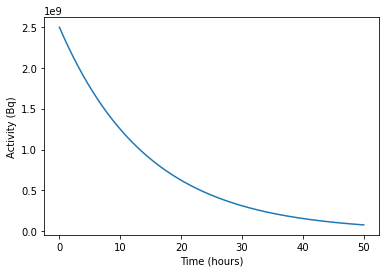

The activity at 5 hours is 1837534990.1209998 Bq


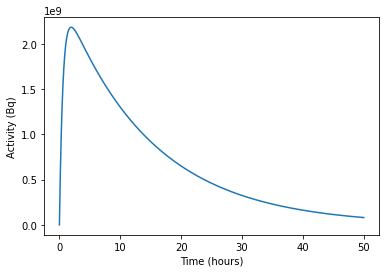

In [149]:
t= np.linspace(start_time, end_time, total_time_steps )

for i in range(0, lambda_len):
    N_list = []
    t_list = []
    for h in range(0, total_time_steps):
        N_of_interest = N[h][i]
        t_of_interest = t[h]
        N_list.append(N_of_interest)
        t_list.append(t_of_interest)
    
    QOI_N_array = np.array(N_list)
    QOI_A = QOI_N_array * lambda_array[i]

    graph = plt.plot(t_list, QOI_A)
    interpolate_cal = np.interp(5, t_list, QOI_A)
    print("The activity at 5 hours is " + str(interpolate_cal) + " Bq")
    plt.xlabel("Time (hours)")
    plt.ylabel("Activity (Bq)")
    plt.show()
    

Absolute error between the calculated QOI and the analytic solution QOI for 100000 time steps

In [150]:
abs_error_1000000 =  (interpolate_anal- interpolate_cal) / interpolate_anal

Absolute error vs time step size

The total step sizes required to obtain an absolute error of 5 or less is 1000000.000000


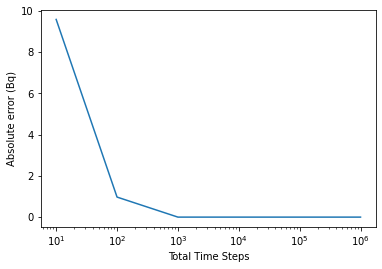

In [152]:
abs_error = [abs(abs_error_10), abs(abs_error_100), abs(abs_error_1000), abs(abs_error_10000), abs(abs_error_100000), abs(abs_error_1000000)]
time_step_var = [10, 100, 1000, 10000, 100000, 1000000]
plt.xscale("log")
plt.plot(time_step_var, abs_error)
plt.xlabel("Total Time Steps")
plt.ylabel("Absolute error (Bq)")
error = np.interp(5, abs_error,time_step_var)
print("The total step sizes required to obtain an absolute error of 5 or less is %f" %error)

The total step sizes required to reach an absolute error of 5 is 1000000 steps, so the time step size is 0.5 E -5 hours

PART 2

Plotting the activity over 200 years

In [29]:
start_time = float(input("starting time:"))
end_time = float(input("ending time:"))
total_time_steps = int(input("number of time steps(PLEASE INPUT AN INTEGER):"))
delta_t = (end_time-start_time)/total_time_steps
t = np.linspace(start_time, end_time, total_time_steps)
hl_list = list(map(float, input("Enter all half lives in a constant unit seperated by a space in order of their respective N value (ex. 20 33 1): ").split()))
hl_array = np.array(hl_list)
lambda_array = np.log(2) / hl_array


N_initial_list = list(map(float, input("Enter all intitial N values seperated by a space in order (ex. 20 33 1): ").split()))
N_initial = np.array(N_initial_list)

if len(lambda_array) != len(N_initial):
    print("The implemented lambdas and Ns do not match, please run the code and re-enter correctly")

starting time:0
ending time:200
number of time steps(PLEASE INPUT AN INTEGER):1000000
Enter all half lives in a constant unit seperated by a space in order of their respective N value (ex. 20 33 1): 1000000000 2 2 500 1000 1600 1
Enter all intitial N values seperated by a space in order (ex. 20 33 1): 12500000000000000000000 0 0 0 0 0 0


In [30]:
lambda_len = len(lambda_array)
N = np.zeros(shape = (total_time_steps, lambda_len))

N[0][:] = N_initial
for k in range(1, total_time_steps):
    for i in range(0,1):
        N[k][i] = (1 - lambda_array[i]*delta_t)*N[k-1][i]
    for i in range(1, lambda_len):
        N[k][i] = N[k-1][i] - N[k-1][i]*lambda_array[i]*delta_t + N[k-1][i-1]*lambda_array[i-1]*delta_t
        

        

Graph for nuclide 0


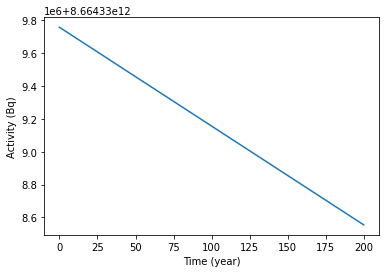

Graph for nuclide 1


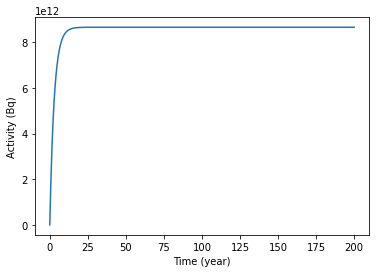

Graph for nuclide 2


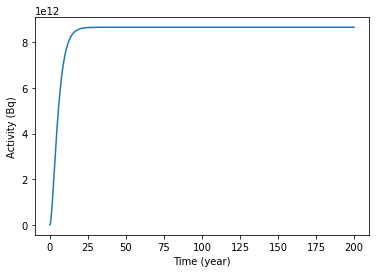

Graph for nuclide 3


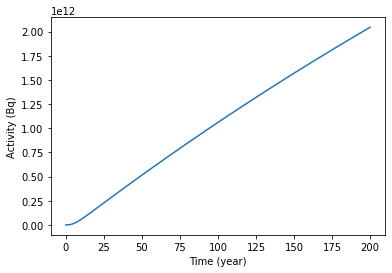

Graph for nuclide 4


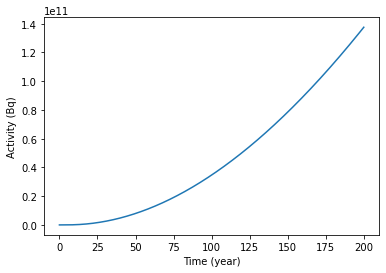

Graph for nuclide 5


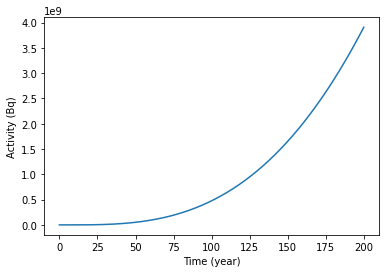

Graph for nuclide 6


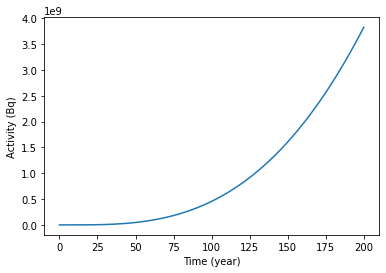

In [37]:

t= np.linspace(start_time, end_time, total_time_steps )

for i in range(0, lambda_len):
    N_list = []
    t_list = []
    for h in range(0, total_time_steps):
        N_of_interest = N[h][i]
        t_of_interest = t[h]
        N_list.append(N_of_interest)
        t_list.append(t_of_interest)
    
    QOI_N_array = np.array(N_list)
    QOI_A = QOI_N_array * lambda_array[i]

    graph = plt.plot(t_list, QOI_A)
    #python starts at 0
    print("Graph for nuclide %d" %i)
    plt.xlabel("Time (year)")
    plt.ylabel("Activity (Bq)")
    plt.show()

10000 years with a stepsize of 4000

In [38]:
start_time = float(input("starting time:"))
end_time = float(input("ending time:"))
total_time_steps = int(input("number of time steps(PLEASE INPUT AN INTEGER):"))
delta_t = (end_time-start_time)/total_time_steps
t = np.linspace(start_time, end_time, total_time_steps)
hl_list = list(map(float, input("Enter all half lives in a constant unit seperated by a space in order of their respective N value (ex. 20 33 1): ").split()))
hl_array = np.array(hl_list)
lambda_array = np.log(2) / hl_array



N_initial_list = list(map(float, input("Enter all intitial N values seperated by a space in order (ex. 20 33 1): ").split()))
N_initial = np.array(N_initial_list)

if len(lambda_array) != len(N_initial):
    print("The implemented lambdas and Ns do not match, please run the code and re-enter correctly")

starting time:0
ending time:10000
number of time steps(PLEASE INPUT AN INTEGER):4000
Enter all half lives in a constant unit seperated by a space in order of their respective N value (ex. 20 33 1): 1000000000 2 2 500 1000 1600 1
Enter all intitial N values seperated by a space in order (ex. 20 33 1): 12500000000000000000000 0 0 0 0 0 0


In [39]:
lambda_len = len(lambda_array)
N = np.zeros(shape = (total_time_steps, lambda_len))

N[0][:] = N_initial
for k in range(1, total_time_steps):
    for i in range(0,1):
        N[k][i] = (1 - lambda_array[i]*delta_t)*N[k-1][i]
    for i in range(1, lambda_len):
        N[k][i] = N[k-1][i] - N[k-1][i]*lambda_array[i]*delta_t + N[k-1][i-1]*lambda_array[i-1]*delta_t

The activity at 2000 years for this nuclide is 8664327748685.043 Bq


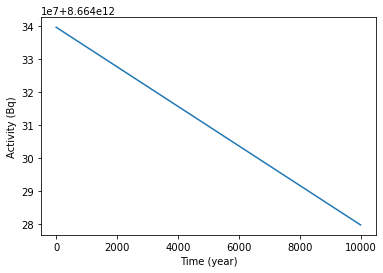

The activity at 2000 years for this nuclide is 8664327766013.698 Bq


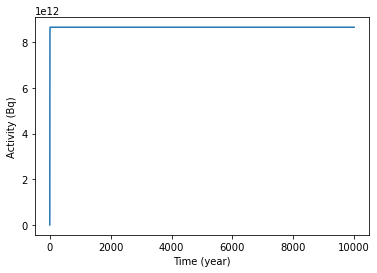

The activity at 2000 years for this nuclide is 8664327783342.3545 Bq


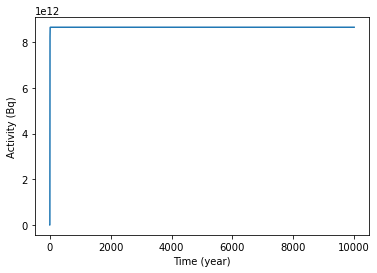

The activity at 2000 years for this nuclide is 8120696890661.69 Bq


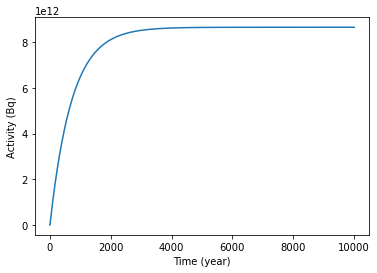

The activity at 2000 years for this nuclide is 4862140021038.057 Bq


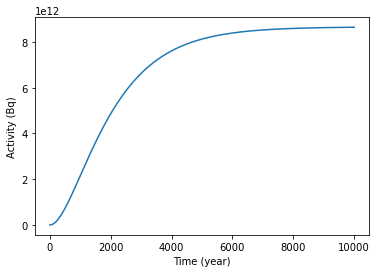

The activity at 2000 years for this nuclide is 1498412756308.4082 Bq


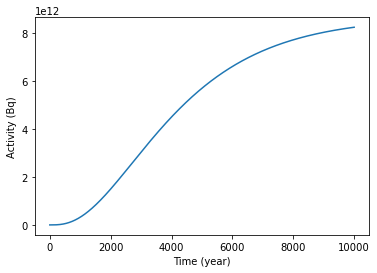

The activity at 2000 years for this nuclide is 1496311151219.87 Bq


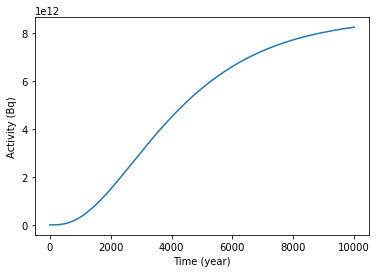

In [40]:
t= np.linspace(start_time, end_time, total_time_steps )

for i in range(0, lambda_len):
    N_list = []
    t_list = []
    for h in range(0, total_time_steps):
        N_of_interest = N[h][i]
        t_of_interest = t[h]
        N_list.append(N_of_interest)
        t_list.append(t_of_interest)
    
    QOI_N_array = np.array(N_list)
    QOI_A = QOI_N_array * lambda_array[i]

    graph = plt.plot(t_list, QOI_A)
    interpolate_cal_A = np.interp(2000, t_list, QOI_A)
    print("The activity at 2000 years for this nuclide is " + str(interpolate_cal_A) + " Bq")
    plt.xlabel("Time (year)")
    plt.ylabel("Activity (Bq)")
    plt.show()

Running the code for 10000 years with a total time step size of 6000

In [41]:
start_time = float(input("starting time:"))
end_time = float(input("ending time:"))
total_time_steps = int(input("number of time steps(PLEASE INPUT AN INTEGER):"))
delta_t = (end_time-start_time)/total_time_steps
t = np.linspace(start_time, end_time, total_time_steps)
hl_list = list(map(float, input("Enter all half lives in a constant unit seperated by a space in order of their respective N value (ex. 20 33 1): ").split()))
hl_array = np.array(hl_list)
lambda_array = np.log(2) / hl_array


N_initial_list = list(map(float, input("Enter all intitial N values seperated by a space in order (ex. 20 33 1): ").split()))
N_initial = np.array(N_initial_list)

if len(lambda_array) != len(N_initial):
    print("The implemented lambdas and Ns do not match, please run the code and re-enter correctly")

starting time:0
ending time:10000
number of time steps(PLEASE INPUT AN INTEGER):6000
Enter all half lives in a constant unit seperated by a space in order of their respective N value (ex. 20 33 1): 1000000000 2 2 500 1000 1600 1
Enter all intitial N values seperated by a space in order (ex. 20 33 1): 12500000000000000000000 0 0 0 0 0 0


In [42]:
lambda_len = len(lambda_array)
N = np.zeros(shape = (total_time_steps, lambda_len))

N[0][:] = N_initial
for k in range(1, total_time_steps):
    for i in range(0,1):
        N[k][i] = (1 - lambda_array[i]*delta_t)*N[k-1][i]
    for i in range(1, lambda_len):
        N[k][i] = N[k-1][i] - N[k-1][i]*lambda_array[i]*delta_t + N[k-1][i-1]*lambda_array[i-1]*delta_t

The activity at 2000 years for this nuclide is 8664327747683.72 Bq


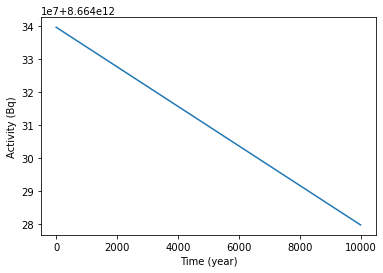

The activity at 2000 years for this nuclide is 8664327765012.375 Bq


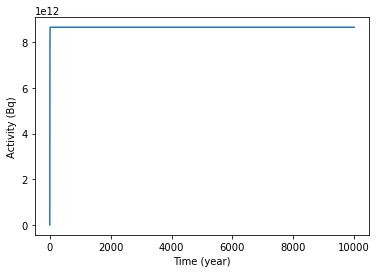

The activity at 2000 years for this nuclide is 8664327782341.03 Bq


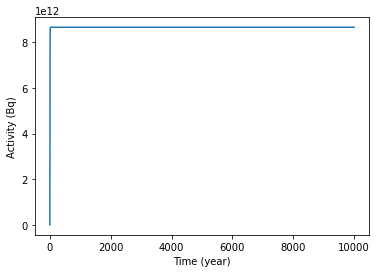

The activity at 2000 years for this nuclide is 8119948636161.101 Bq


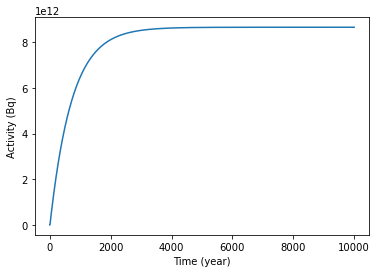

The activity at 2000 years for this nuclide is 4861648124172.77 Bq


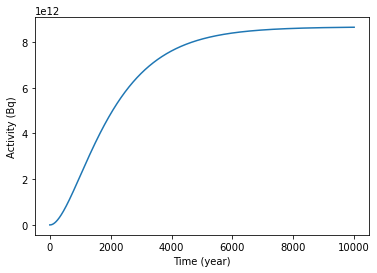

The activity at 2000 years for this nuclide is 1498946144973.3047 Bq


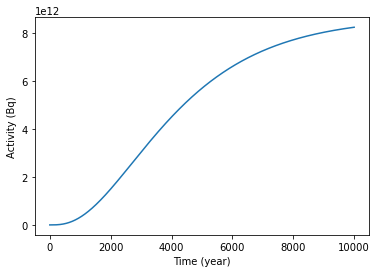

The activity at 2000 years for this nuclide is 1496845180927.552 Bq


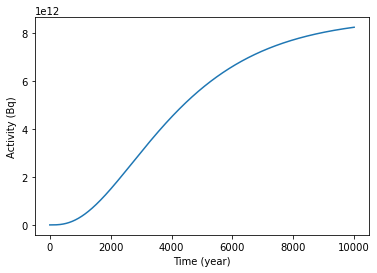

In [43]:
t= np.linspace(start_time, end_time, total_time_steps )

for i in range(0, lambda_len):
    N_list = []
    t_list = []
    for h in range(0, total_time_steps):
        N_of_interest = N[h][i]
        t_of_interest = t[h]
        N_list.append(N_of_interest)
        t_list.append(t_of_interest)
    
    QOI_N_array = np.array(N_list)
    QOI_A = QOI_N_array * lambda_array[i]

    graph = plt.plot(t_list, QOI_A)
    interpolate_cal_B = np.interp(2000, t_list, QOI_A)
    print("The activity at 2000 years for this nuclide is " + str(interpolate_cal_B) + " Bq")
    plt.xlabel("Time (year)")
    plt.ylabel("Activity (Bq)")
    plt.show()

I am going to compare the activity of the last nuclide in order to do an error analysis. Due to Euler's method having a proportional error, I belive the larger total step size amound will be the "expected" value, as increasing the total step sizes by 2 decreases the step size and thus the error by 2.

In [44]:
error_first = ((interpolate_cal_B - interpolate_cal_A) / interpolate_cal_B)
print("The absolute error was")
print(error_first)   
print("Bq. This is much smaller than 1 Bq" )

The absolute error was
0.0003567701686763369
Bq. This is much smaller than 1 Bq


I arrived at using 6000 total time steps as that was the value found at the end of part 1. It is large, but due to the increminative nature of Euler's a larger step size makes for a more accurate result. I could decrease the time step by many orders of magnitude and still obtain an absolute error less than 1 Bq. Much like part 2 I am going to create a graph of absolute error compared to step size.

Running the code for 10000 years with a total step size of 12000

In [45]:
start_time = float(input("starting time:"))
end_time = float(input("ending time:"))
total_time_steps = int(input("number of time steps(PLEASE INPUT AN INTEGER):"))
delta_t = (end_time-start_time)/total_time_steps
t = np.linspace(start_time, end_time, total_time_steps)
hl_list = list(map(float, input("Enter all half lives in a constant unit seperated by a space in order of their respective N value (ex. 20 33 1): ").split()))
hl_array = np.array(hl_list)
lambda_array = np.log(2) / hl_array


N_initial_list = list(map(float, input("Enter all intitial N values seperated by a space in order (ex. 20 33 1): ").split()))
N_initial = np.array(N_initial_list)

if len(lambda_array) != len(N_initial):
    print("The implemented lambdas and Ns do not match, please run the code and re-enter correctly")

starting time:0
ending time:10000
number of time steps(PLEASE INPUT AN INTEGER):12000
Enter all half lives in a constant unit seperated by a space in order of their respective N value (ex. 20 33 1): 1000000000 2 2 500 1000 1600 1
Enter all intitial N values seperated by a space in order (ex. 20 33 1): 12500000000000000000000 0 0 0 0 0 0


In [46]:
lambda_len = len(lambda_array)
N = np.zeros(shape = (total_time_steps, lambda_len))

N[0][:] = N_initial
for k in range(1, total_time_steps):
    for i in range(0,1):
        N[k][i] = (1 - lambda_array[i]*delta_t)*N[k-1][i]
    for i in range(1, lambda_len):
        N[k][i] = N[k-1][i] - N[k-1][i]*lambda_array[i]*delta_t + N[k-1][i-1]*lambda_array[i-1]*delta_t

The activity at 2000 years for this nuclide is 8664327746683.908 Bq


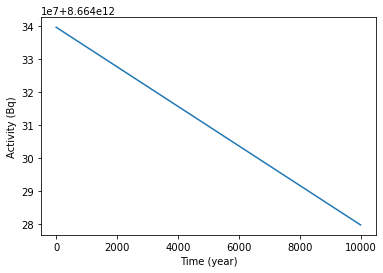

The activity at 2000 years for this nuclide is 8664327764012.56 Bq


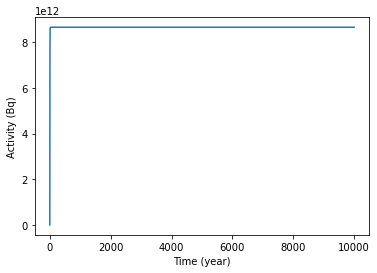

The activity at 2000 years for this nuclide is 8664327781341.212 Bq


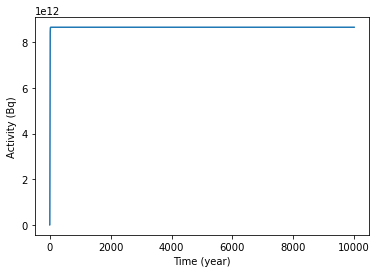

The activity at 2000 years for this nuclide is 8119200439992.383 Bq


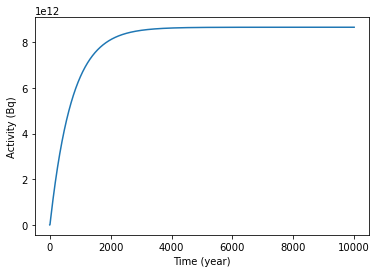

The activity at 2000 years for this nuclide is 4861156635474.037 Bq


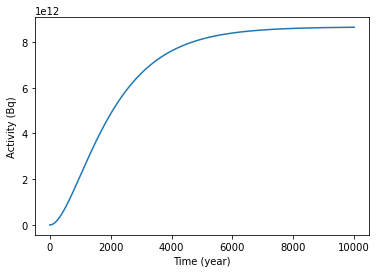

The activity at 2000 years for this nuclide is 1499479084263.1228 Bq


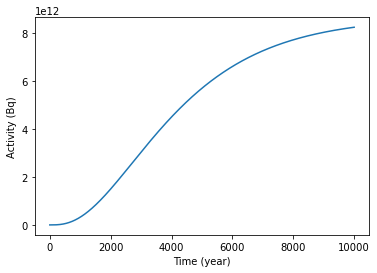

The activity at 2000 years for this nuclide is 1497378760723.6392 Bq


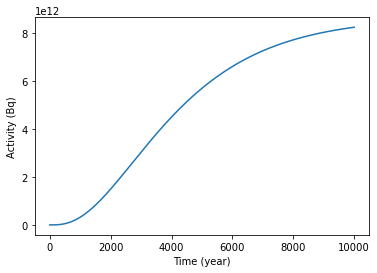

In [47]:
t= np.linspace(start_time, end_time, total_time_steps )

for i in range(0, lambda_len):
    N_list = []
    t_list = []
    for h in range(0, total_time_steps):
        N_of_interest = N[h][i]
        t_of_interest = t[h]
        N_list.append(N_of_interest)
        t_list.append(t_of_interest)
    
    QOI_N_array = np.array(N_list)
    QOI_A = QOI_N_array * lambda_array[i]

    graph = plt.plot(t_list, QOI_A)
    interpolate_cal_C = np.interp(2000, t_list, QOI_A)
    print("The activity at 2000 years for this nuclide is " + str(interpolate_cal_C) + " Bq")
    plt.xlabel("Time (year)")
    plt.ylabel("Activity (Bq)")
    plt.show()

Now finding the error again

In [48]:
error_second = (( interpolate_cal_C - interpolate_cal_B) / interpolate_cal_C)
print("The absolute error was" )
print(error_second) 
print("Bq. This is much smaller than 1 Bq")

The absolute error was
0.00035634257015191987
Bq. This is much smaller than 1 Bq


10000 years with a stepsize of 50000

In [49]:
start_time = float(input("starting time:"))
end_time = float(input("ending time:"))
total_time_steps = int(input("number of time steps(PLEASE INPUT AN INTEGER):"))
delta_t = (end_time-start_time)/total_time_steps
t = np.linspace(start_time, end_time, total_time_steps)
hl_list = list(map(float, input("Enter all half lives in a constant unit seperated by a space in order of their respective N value (ex. 20 33 1): ").split()))
hl_array = np.array(hl_list)
lambda_array = np.log(2) / hl_array


N_initial_list = list(map(float, input("Enter all intitial N values seperated by a space in order (ex. 20 33 1): ").split()))
N_initial = np.array(N_initial_list)

if len(lambda_array) != len(N_initial):
    print("The implemented lambdas and Ns do not match, please run the code and re-enter correctly")

starting time:0
ending time:10000
number of time steps(PLEASE INPUT AN INTEGER):50000
Enter all half lives in a constant unit seperated by a space in order of their respective N value (ex. 20 33 1): 1000000000 2 2 500 1000 1600 1
Enter all intitial N values seperated by a space in order (ex. 20 33 1): 12500000000000000000000 0 0 0 0 0 0


In [50]:
lambda_len = len(lambda_array)
N = np.zeros(shape = (total_time_steps, lambda_len))

N[0][:] = N_initial
for k in range(1, total_time_steps):
    for i in range(0,1):
        N[k][i] = (1 - lambda_array[i]*delta_t)*N[k-1][i]
    for i in range(1, lambda_len):
        N[k][i] = N[k-1][i] - N[k-1][i]*lambda_array[i]*delta_t + N[k-1][i-1]*lambda_array[i-1]*delta_t

The activity at 2000 years for this nuclide is 8664327745921.681 Bq


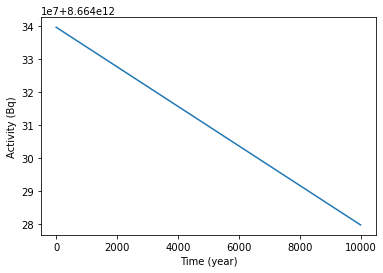

The activity at 2000 years for this nuclide is 8664327763250.341 Bq


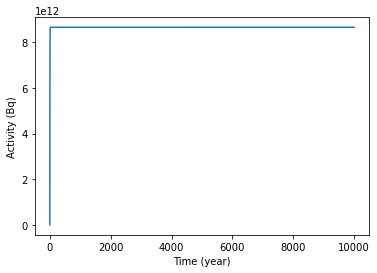

The activity at 2000 years for this nuclide is 8664327780579.005 Bq


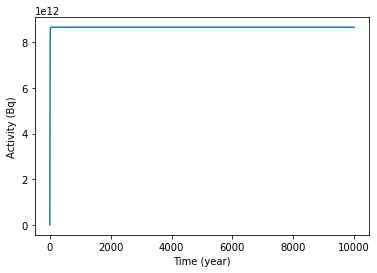

The activity at 2000 years for this nuclide is 8118631850145.915 Bq


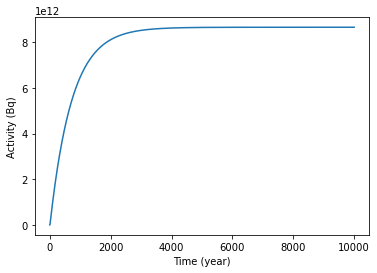

The activity at 2000 years for this nuclide is 4860783376611.449 Bq


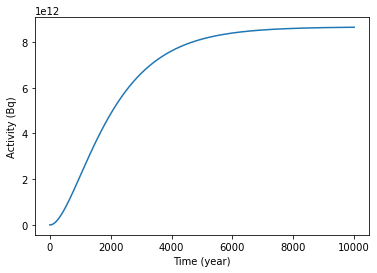

The activity at 2000 years for this nuclide is 1499883817945.503 Bq


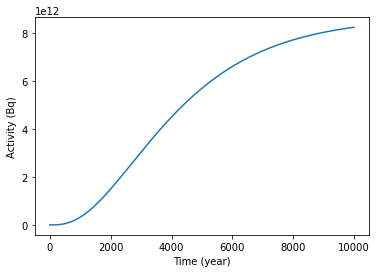

The activity at 2000 years for this nuclide is 1497783980832.4595 Bq


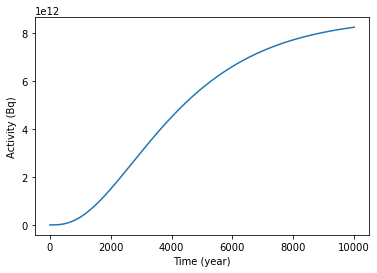

In [51]:
t= np.linspace(start_time, end_time, total_time_steps )

for i in range(0, lambda_len):
    N_list = []
    t_list = []
    for h in range(0, total_time_steps):
        N_of_interest = N[h][i]
        t_of_interest = t[h]
        N_list.append(N_of_interest)
        t_list.append(t_of_interest)
    
    QOI_N_array = np.array(N_list)
    QOI_A = QOI_N_array * lambda_array[i]

    graph = plt.plot(t_list, QOI_A)
    interpolate_cal_D = np.interp(2000, t_list, QOI_A)
    print("The activity at 2000 years for this nuclide is " + str(interpolate_cal_D) + " Bq")
    plt.xlabel("Time (year)")
    plt.ylabel("Activity (Bq)")
    plt.show()

Now finding the error again

In [52]:
error_third = (( interpolate_cal_D - interpolate_cal_C) / interpolate_cal_D)
print("The absolute error was" )
print(error_third) 
print("Bq. This is much smaller than 1 Bq")

The absolute error was
0.00027054642992983114
Bq. This is much smaller than 1 Bq


10000 years with a stepsize of 100000

In [53]:
start_time = float(input("starting time:"))
end_time = float(input("ending time:"))
total_time_steps = int(input("number of time steps(PLEASE INPUT AN INTEGER):"))
delta_t = (end_time-start_time)/total_time_steps
t = np.linspace(start_time, end_time, total_time_steps)
hl_list = list(map(float, input("Enter all half lives in a constant unit seperated by a space in order of their respective N value (ex. 20 33 1): ").split()))
hl_array = np.array(hl_list)
lambda_array = np.log(2) / hl_array


N_initial_list = list(map(float, input("Enter all intitial N values seperated by a space in order (ex. 20 33 1): ").split()))
N_initial = np.array(N_initial_list)

if len(lambda_array) != len(N_initial):
    print("The implemented lambdas and Ns do not match, please run the code and re-enter correctly")

starting time:0
ending time:10000
number of time steps(PLEASE INPUT AN INTEGER):100000
Enter all half lives in a constant unit seperated by a space in order of their respective N value (ex. 20 33 1): 1000000000 2 2 500 1000 1600 1
Enter all intitial N values seperated by a space in order (ex. 20 33 1): 12500000000000000000000 0 0 0 0 0 0


In [54]:
lambda_len = len(lambda_array)
N = np.zeros(shape = (total_time_steps, lambda_len))

N[0][:] = N_initial
for k in range(1, total_time_steps):
    for i in range(0,1):
        N[k][i] = (1 - lambda_array[i]*delta_t)*N[k-1][i]
    for i in range(1, lambda_len):
        N[k][i] = N[k-1][i] - N[k-1][i]*lambda_array[i]*delta_t + N[k-1][i-1]*lambda_array[i-1]*delta_t

The activity at 2000 years for this nuclide is 8664327745815.639 Bq


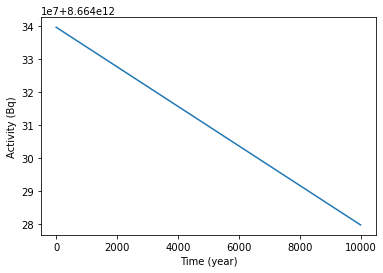

The activity at 2000 years for this nuclide is 8664327763144.278 Bq


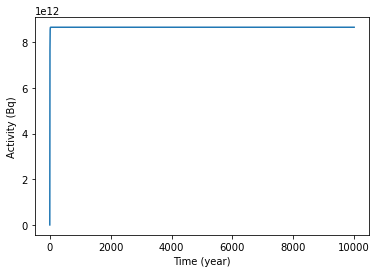

The activity at 2000 years for this nuclide is 8664327780472.919 Bq


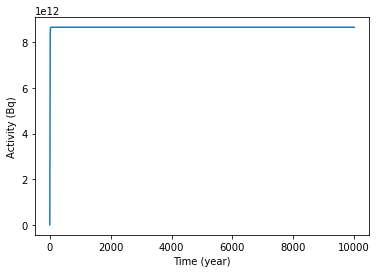

The activity at 2000 years for this nuclide is 8118542075921.497 Bq


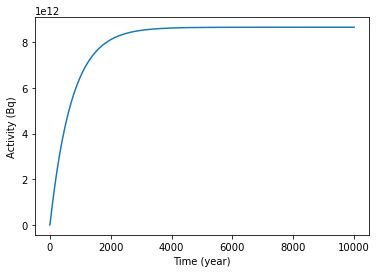

The activity at 2000 years for this nuclide is 4860724462498.705 Bq


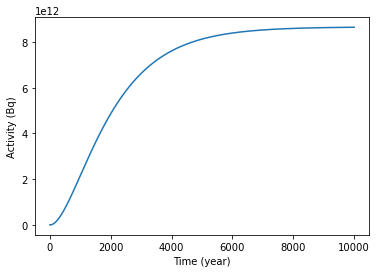

The activity at 2000 years for this nuclide is 1499947699585.7444 Bq


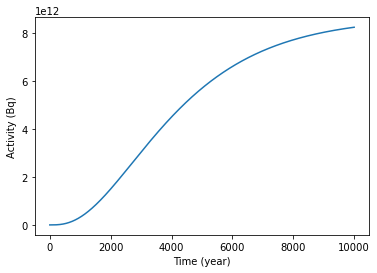

The activity at 2000 years for this nuclide is 1497847939248.6123 Bq


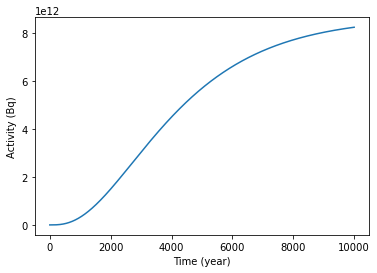

In [55]:
t= np.linspace(start_time, end_time, total_time_steps )

for i in range(0, lambda_len):
    N_list = []
    t_list = []
    for h in range(0, total_time_steps):
        N_of_interest = N[h][i]
        t_of_interest = t[h]
        N_list.append(N_of_interest)
        t_list.append(t_of_interest)
    
    QOI_N_array = np.array(N_list)
    QOI_A = QOI_N_array * lambda_array[i]

    graph = plt.plot(t_list, QOI_A)
    interpolate_cal_E = np.interp(2000, t_list, QOI_A)
    print("The activity at 2000 years for this nuclide is " + str(interpolate_cal_E) + " Bq")
    plt.xlabel("Time (year)")
    plt.ylabel("Activity (Bq)")
    plt.show()

Now finding the error again

In [56]:
error_fourth = (( interpolate_cal_E - interpolate_cal_D) / interpolate_cal_D)
print("The absolute error was" )
print(error_fourth) 
print("Bq. This is much smaller than 1 Bq")

The absolute error was
4.270202977954426e-05
Bq. This is much smaller than 1 Bq


100000.0


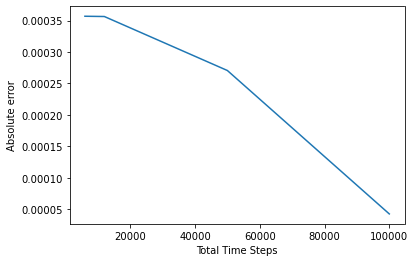

In [62]:
part_2_error = [error_first, error_second, error_third, error_fourth]
part_2_time_step = [6000, 12000 , 50000, 100000]
graph = plt.plot(part_2_time_step, part_2_error)
right = np.interp(1, part_2_error, part_2_time_step )
plt.xlabel("Total Time Steps")
plt.ylabel("Absolute error")
print(right)

So, according to this error analysis, I would need a total step size of 100000 to find an error of 1 Bq. Anything more than that is above 1 Bq. This translates to a step size of about 0.1 of a year. 

<b>Summary </b> <br>
The results of this project show that it is possible to model acitivyt with Euler's method. The absolute error for the values was converging to zero as time step increased, so this shows that as more time steps are added and the time step decreases, the results will become more accurate. This is desirable behavior for Euler's method.